In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sksurv.nonparametric import kaplan_meier_estimator, nelson_aalen_estimator

In [2]:
DatOriginal = pd.read_csv("DatasetsMedicalResearch/Time to discontinuation of the use of an IUD.dat", sep="\s+")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3525/1545641242.py:1: SyntaxWarning: invalid escape sequence '\s'
  DatOriginal = pd.read_csv("DatasetsMedicalResearch/Time to discontinuation of the use of an IUD.dat", sep="\s+")


In [9]:
time, survival_prob, conf_int = kaplan_meier_estimator(
    DatOriginal["status"].astype(bool), DatOriginal["time"], conf_type="log-log"
)

Text(0.5, 0, 'time $t$')

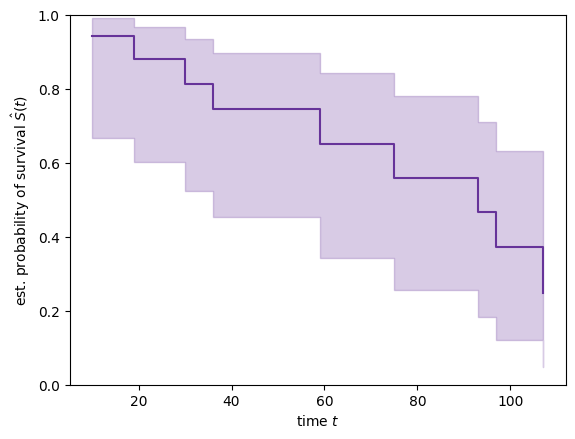

In [10]:
plt.step(time, survival_prob, where="post", color='rebeccapurple')
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post", color='rebeccapurple')
plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [13]:
_, cummulative_hazard = nelson_aalen_estimator(
    DatOriginal["status"].astype(bool), DatOriginal["time"]
)

Text(0.5, 0, 'time $t$')

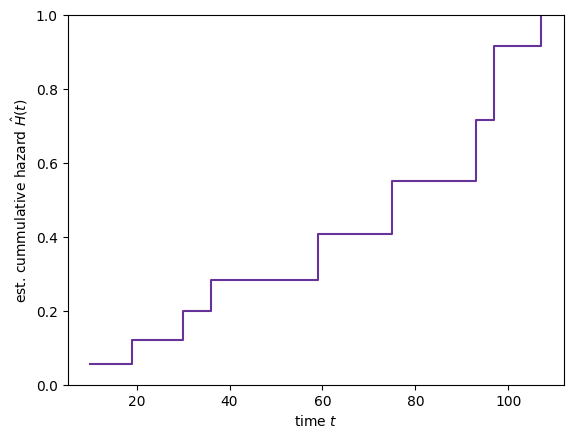

In [14]:
plt.step(time, cummulative_hazard, where="post", color='rebeccapurple')
#plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post", color='rebeccapurple')
plt.ylim(0, 1)
plt.ylabel(r"est. cummulative hazard $\hat{H}(t)$")
plt.xlabel("time $t$")

In [19]:
time[survival_prob<=0.5].min()

93

In [36]:
EPSILON = 0.05

In [37]:
u = time[survival_prob>=1-0.5+EPSILON].max()
l = time[survival_prob<=1-0.5-EPSILON].min()

In [38]:
u, l

(75, 97)